In [61]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

In [62]:
#parallisation on Gershman 09's model, ring MRF
#p: no. simulations running in parallel
def likelihood_ring(z,a,b,sigma,p):
    #bi-modal, mixture of Gaussian function
    #2 peaks at -1 and 1
    #return: a scalar, p(x|z) as a functino of z
    likelihood_ele = np.exp(-0.5/sigma**2*(z.reshape((p,-1))-a)**2) + np.exp(-0.5/sigma**2*(z.reshape((p,-1))-b)**2)
    return np.prod(likelihood_ele,axis=1)

In [63]:
def proposal_function_ring(z, p, sigma1 = 1.5):
    #generate a new proposal from the current sample
    #change only one element at a time!
    dim = z.shape[1]
    z_star = z.copy()
    index = random.randint(0,dim,p)
    for i in range(p):
        z_star[i,index[i]] = z_star[i,index[i]] + sigma1*np.random.normal()
    return z_star

In [64]:
def MRF_prior_ring(z,lamda,p):
    #return the Gaussian MRF of the perception
    #'reflection on boundary first
    dim = z.shape[1]
    z_extended = np.concatenate((z[:,-1].reshape(p,-1),z,z[:,0].reshape(p,-1)),axis=1)
    sum_dis = np.sum((z-z_extended[:,:dim])**2,axis=1)+np.sum((z-z_extended[:,2:])**2,axis=1)
    return np.exp(-lamda*sum_dis)

In [65]:
def sample_rejection_ring(z,z_star,p,a, b, sigma, lamda):
    #input: z is the current sample
    #z_star is the proposed sample
    #if sample accepted: return True
    #if rejected: return False
    p_z = likelihood_ring(z,a,b,sigma,p)*MRF_prior_ring(z,lamda,p)
    p_z_star = likelihood_ring(z_star,a,b,sigma,p)*MRF_prior_ring(z_star,lamda,p)
    p_acc = p_z_star/p_z
    p_ran = random.random(p)
    acc = np.sign(p_acc-p_ran).astype('int')
    return acc

In [99]:
def simulation(p,no_samples,a = 1, b = -1, sigma = 0.3, lamda = 0.1,dim = 4):
    state_list_par = []
    #define initial z
    z = (np.random.rand(p,dim)-0.5)*2
    for i in range(int(no_samples)):
        z_star = proposal_function_ring(z,p)
        acc = sample_rejection_ring(z,z_star,p,a, b, sigma, lamda)
        for j in range(p):
            if acc[j] == 1:
                z[j,:] = z_star[j,:]
        z_a = z.copy()
        state_list_par.append(z_a)
    return state_list_par

In [100]:
p,no_samples = 400,22000
s = simulation(p,no_samples,a = 1, b = -1, sigma = 0.3, lamda = 0.2,dim = 7)
s = np.array(s)

In [69]:
def corr(x,y):
    return (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.var(x)*np.var(y))**0.5

def autocorr(x,y,n):
    #x, y: arrays to calculate correlation
    #n: cover correlation rxy(0) to rxy(n-1)
    rxy = []
    for i in range(n):
        y_shift = np.concatenate((np.zeros(i),y[:(len(y)-i)]))
        rxy.append(corr(x,y_shift))
    return np.array(rxy)

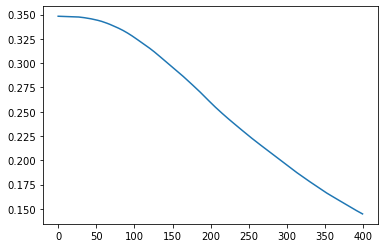

In [101]:
autocorr_s_1 = autocorr(s[:,0,0],s[:,0,3],400)
p=400
for i in range(1,p):
    autocorr_s_1 = autocorr_s_1 + autocorr(s[:,i,0],s[:,i,3],400)
autocorr_s_1 = autocorr_s_1/p
plt.plot(autocorr_s_1)

In [104]:
autocorr_s_0 = autocorr(s[:,0,0],s[:,0,0],400)

for i in range(1,p):
    autocorr_s_0 = autocorr_s_0 + autocorr(s[:,i,0],s[:,i,0],400)
autocorr_s_0 = autocorr_s_0/p

autocorr_s_1 = autocorr(s[:,0,0],s[:,0,1],400)
for i in range(1,p):
    autocorr_s_1 = autocorr_s_1 + autocorr(s[:,i,0],s[:,i,1],400)
autocorr_s_1 = autocorr_s_1/p

autocorr_s_2 = autocorr(s[:,0,0],s[:,0,2],400)
for i in range(1,p):
    autocorr_s_2 = autocorr_s_2 + autocorr(s[:,i,0],s[:,i,2],400)
autocorr_s_2 = autocorr_s_2/p

autocorr_s_3 = autocorr(s[:,0,0],s[:,0,3],400)
for i in range(1,p):
    autocorr_s_3 = autocorr_s_3 + autocorr(s[:,i,0],s[:,i,3],400)
autocorr_s_3 = autocorr_s_3/p

autocorr_s_4 = autocorr(s[:,0,0],s[:,0,4],400)
for i in range(1,p):
    autocorr_s_4 = autocorr_s_4 + autocorr(s[:,i,0],s[:,i,4],400)
autocorr_s_4 = autocorr_s_4/p

autocorr_s_5 = autocorr(s[:,0,0],s[:,0,5],400)
for i in range(1,p):
    autocorr_s_5 = autocorr_s_5 + autocorr(s[:,i,0],s[:,i,5],400)
autocorr_s_5 = autocorr_s_5/p

autocorr_s_6 = autocorr(s[:,0,0],s[:,0,6],400)
for i in range(1,p):
    autocorr_s_6 = autocorr_s_6 + autocorr(s[:,i,0],s[:,i,6],400)
autocorr_s_6 = autocorr_s_6/p

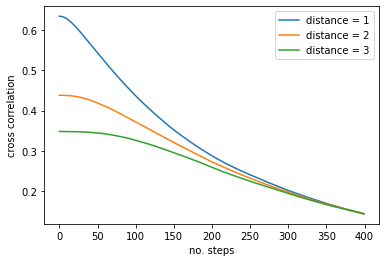

In [107]:
plt.plot(autocorr_s_1)
plt.plot(autocorr_s_2)
plt.plot(autocorr_s_3)
plt.xlabel('no. steps')
plt.ylabel('cross correlation')
plt.legend(['distance = 1', 'distance = 2', 'distance = 3'])

Text(0.5, 1.0, 'travelling waves by cross correlation')

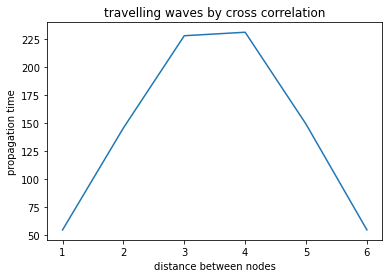

In [125]:
plt.plot(np.arange(1,7),1300*np.exp(-5*np.array([autocorr_s_1[0],autocorr_s_2[0],autocorr_s_3[0],autocorr_s_4[0],autocorr_s_5[0],autocorr_s_6[0]])))
plt.ylabel('propagation time')
plt.xlabel('distance between nodes')
plt.title('travelling waves by cross correlation')